In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# import tensorflow as tf
# import os

# # Define target image size
# IMG_HEIGHT = 224
# IMG_WIDTH = 224

# # Function to load and preprocess images
# def load_and_preprocess_image(path):
#     image = tf.io.read_file(path)
#     image = tf.image.decode_jpeg(image, channels=3)  # Adjust decode function if using other formats
#     image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
#     image /= 255.0  # Normalize to [0,1] if needed
#     return image

# # Function to get image file paths and labels from a directory structure
# def get_image_paths_and_labels(root_dir):
#     image_paths = []
#     labels = []
#     class_names = sorted(os.listdir(root_dir))
#     class_indices = {name: index for index, name in enumerate(class_names)}

#     for class_name in class_names:
#         class_dir = os.path.join(root_dir, class_name)
#         if os.path.isdir(class_dir):
#             for fname in os.listdir(class_dir):
#                 if fname.endswith('.jpg'):  # Adjust based on format
#                     image_paths.append(os.path.join(class_dir, fname))
#                     labels.append(class_indices[class_name])

#     return image_paths, labels, class_names

# # Directory containing labeled image folders
# root_dir = 'path_to_image_data_folder'  # Replace with your image data folder
# image_paths, labels, class_names = get_image_paths_and_labels(root_dir)

# # Function to load and preprocess images along with their labels
# def load_and_preprocess_from_path_label(path, label):
#     return load_and_preprocess_image(path), label

# # Create a TensorFlow dataset
# dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
# dataset = dataset.map(load_and_preprocess_from_path_label, num_parallel_calls=tf.data.experimental.AUTOTUNE)

# # Shuffle, batch, and prefetch the dataset
# BATCH_SIZE = 32
# dataset = dataset.shuffle(buffer_size=len(image_paths))
# dataset = dataset.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# # Example usage: iterate through the dataset
# for batch_images, batch_labels in dataset:
#     # Process your batch of resized images and labels
#     pass


In [41]:
IMG_SIZE = 256
CHANNELS = 3
BATCH_SIZE = 12

In [42]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Indian_Food_Images",
    shuffle=True,
    image_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
)

Found 150 files belonging to 3 classes.


In [43]:
class_names = dataset.class_names
class_names

['chapati', 'chicken_tikka', 'jalebi']

In [45]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch)
    print(label_batch)

tf.Tensor(
[[[[5.00000000e+01 4.40000000e+01 4.40000000e+01]
   [5.01113281e+01 4.42226562e+01 4.38886719e+01]
   [5.11855469e+01 4.61855469e+01 4.31855469e+01]
   ...
   [5.18554688e+00 3.74218750e+00 3.62890625e+00]
   [5.00000000e+00 3.00000000e+00 4.00000000e+00]
   [5.00000000e+00 3.00000000e+00 4.00000000e+00]]

  [[5.05722656e+01 4.45722656e+01 4.45722656e+01]
   [5.06835938e+01 4.47949219e+01 4.44609375e+01]
   [5.17578125e+01 4.67578125e+01 4.37578125e+01]
   ...
   [6.11771393e+00 4.67435455e+00 4.56107330e+00]
   [6.14453125e+00 4.14453125e+00 5.14453125e+00]
   [6.14453125e+00 4.14453125e+00 5.14453125e+00]]

  [[5.15742188e+01 4.55742188e+01 4.55742188e+01]
   [5.16855469e+01 4.57968750e+01 4.54628906e+01]
   [5.28130379e+01 4.78130379e+01 4.48130379e+01]
   ...
   [7.51596451e+00 6.07260513e+00 5.95932388e+00]
   [7.86132812e+00 5.86132812e+00 6.86132812e+00]
   [7.86132812e+00 5.86132812e+00 6.86132812e+00]]

  ...

  [[1.74990601e+02 1.41038361e+02 9.51663818e+01]
   [1

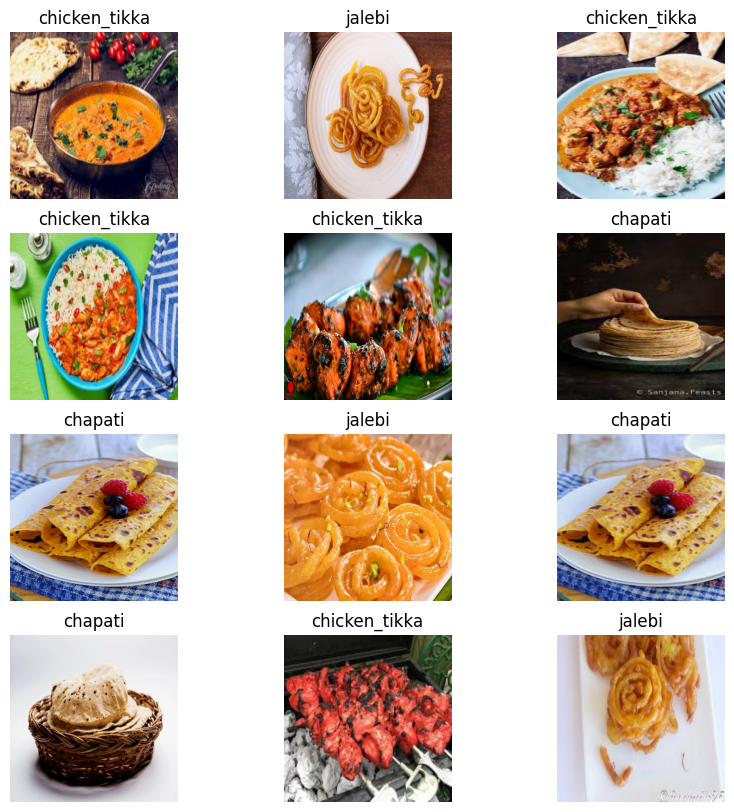

In [46]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(4,3,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [47]:
len(class_names)

3

In [48]:
len(dataset)

13

80% ==> training

20% ==> 10% validation, 10% test

In [14]:
# train_size = 0.8
# len(dataset)*train_size

In [15]:
# train_ds = dataset.take(28)
# len(train_ds)

In [16]:
# rem_ds = dataset.skip(28)
# len(rem_ds)

In [17]:
# test_ds = rem_ds.take(4)
# val_ds = rem_ds.skip(4)
# print('train size',len(train_ds))
# print('test size',len(test_ds))
# print('val size',len(val_ds))

In [53]:
def get_dataset_partition_tf(ds, train_split = 0.8, val_split=0.1, shuffle = True, shuffle_size=1000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 10)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, test_ds, val_ds

In [54]:
train_ds, test_ds, val_ds = get_dataset_partition_tf(dataset)
print('train size',len(train_ds))
print('test size',len(test_ds))
print('val size',len(val_ds))

train size 10
test size 2
val size 1


In [55]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [56]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [57]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomWidth(0.2),
    layers.RandomHeight(0.2),
])

In [63]:
input_shape = (IMG_SIZE, IMG_SIZE,3)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),  # Define the input layer with the correct shape
    resize_and_rescale,
    data_augmentation,
    
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.GlobalAveragePooling2D(),
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(n_classes, activation='softmax'),
])


model.build(input_shape = input_shape)

In [64]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 sequential_4 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_10 (Bat  (None, 254, 254, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 125, 125, 64)     

In [65]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9
)

In [66]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [67]:
history = model.fit(
    train_ds,
    epochs = 50,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50


10/10 [==============================] - 11s 827ms/step - loss: 1.5064 - accuracy: 0.5000 - val_loss: 1.1835 - val_accuracy: 0.1667
Epoch 2/50
10/10 [==============================] - 8s 832ms/step - loss: 0.9681 - accuracy: 0.6842 - val_loss: 1.8011 - val_accuracy: 0.1667
Epoch 3/50
10/10 [==============================] - 7s 711ms/step - loss: 0.5983 - accuracy: 0.8158 - val_loss: 2.7135 - val_accuracy: 0.1667
Epoch 4/50
10/10 [==============================] - 7s 781ms/step - loss: 0.6414 - accuracy: 0.7807 - val_loss: 4.3950 - val_accuracy: 0.1667
Epoch 5/50
10/10 [==============================] - 7s 675ms/step - loss: 0.5506 - accuracy: 0.7281 - val_loss: 5.2364 - val_accuracy: 0.1667
Epoch 6/50
10/10 [==============================] - 7s 631ms/step - loss: 0.4069 - accuracy: 0.8509 - val_loss: 5.9752 - val_accuracy: 0.1667
Epoch 7/50
10/10 [==============================] - 7s 684ms/step - loss: 0.3289 - accuracy: 0.8421 - val_loss: 6.9483 - val_accuracy: 0.1667
Epoch 8/50
10/10

In [68]:
scores = model.evaluate(test_ds)

2/2 [==============================] - 0s 8ms/step - loss: 1.1053 - accuracy: 0.7778


In [69]:
history

In [70]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 10}

In [71]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [72]:
print(history.history['accuracy'])
len(history.history['accuracy'])

[0.5, 0.6842105388641357, 0.8157894611358643, 0.780701756477356, 0.7280701994895935, 0.8508771657943726, 0.8421052694320679, 0.8859649300575256, 0.8771929740905762, 0.8684210777282715, 0.9210526347160339, 0.9298245906829834, 0.9210526347160339, 0.9473684430122375, 0.9561403393745422, 0.9649122953414917, 0.9035087823867798, 0.8771929740905762, 0.9210526347160339, 0.9385964870452881, 0.9385964870452881, 0.9122806787490845, 0.9298245906829834, 0.9912280440330505, 0.9736841917037964, 0.9736841917037964, 0.9473684430122375, 0.9649122953414917, 0.9210526347160339, 0.9561403393745422, 0.9035087823867798, 0.9736841917037964, 0.9122806787490845, 0.9298245906829834, 0.8947368264198303, 0.9298245906829834, 0.9298245906829834, 0.9736841917037964, 1.0, 0.9561403393745422, 0.9473684430122375, 0.9473684430122375, 0.9649122953414917, 0.9561403393745422, 0.9561403393745422, 0.9824561476707458, 1.0, 0.9824561476707458, 0.9736841917037964, 0.9912280440330505]


50

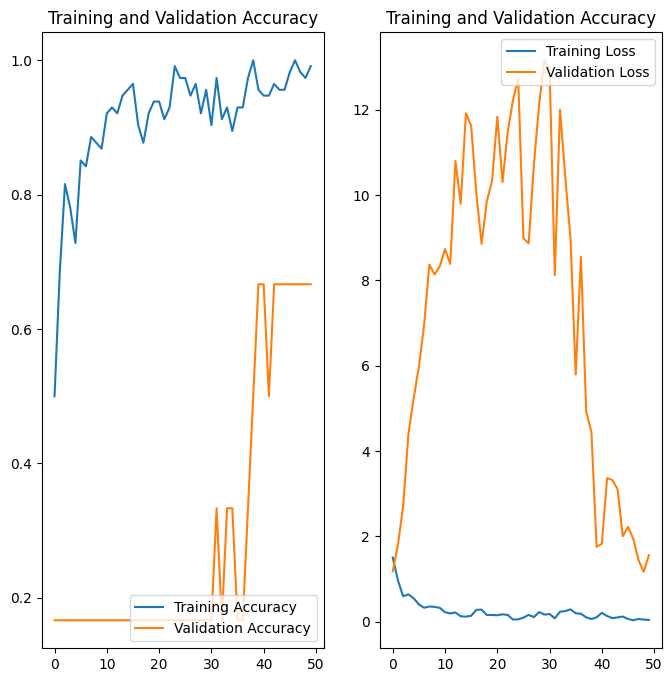

In [73]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(50), history.history['accuracy'], label="Training Accuracy")
plt.plot(range(50), history.history['val_accuracy'], label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(50), history.history['loss'], label="Training Loss")
plt.plot(range(50), history.history['val_loss'], label="Validation Loss")
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')
plt.show()

first image to predict
first image's actual label: chicken_tikka
1/1 [==============================] - 0s 98ms/step
Predicted Label: chicken_tikka


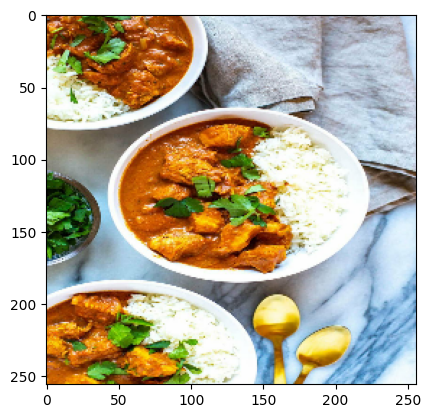

In [74]:
for image_batch, label_batch in test_ds.take(1):
    first_image = (image_batch[0].numpy().astype('uint8'))
    first_label = label_batch[0].numpy()

    print('first image to predict')
    plt.imshow(first_image)
    print("first image's actual label:",class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])

In [75]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 17ms/step


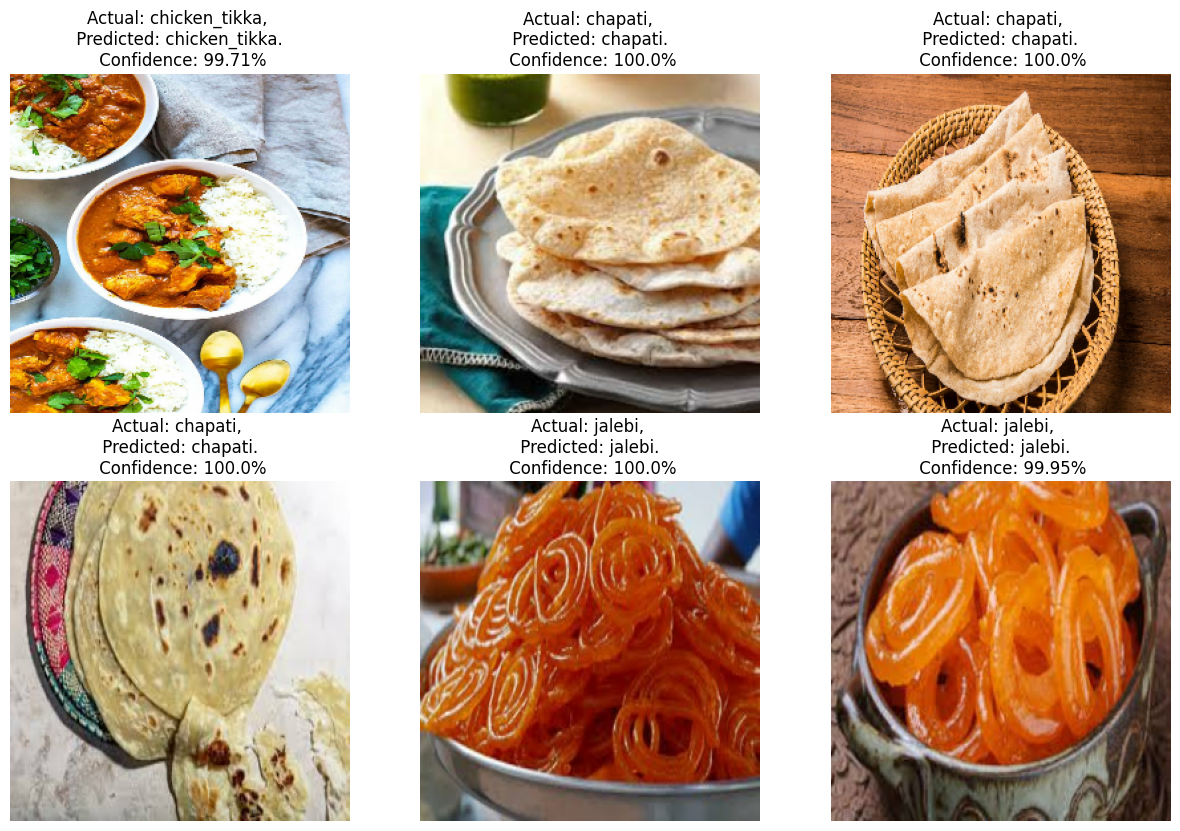

In [79]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(2):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}. \n Confidence: {confidence}%")
        plt.axis("off")

In [80]:
import os
model_version = max([int(i) for i in os.listdir("models") + [0]]) + 1
model.save(f"models/{model_version}")

INFO:tensorflow:Assets written to: models/4\assets


INFO:tensorflow:Assets written to: models/4\assets


## Quantization aware training

In [89]:
import tensorflow_model_optimization as tfmot

In [94]:
converter = tf.lite.TFLiteConverter.from_saved_model("models/4")
tflite_model = converter.convert()

In [95]:
len(tflite_model)

2291300

In [96]:
with open("tflite_model.tflite",'wb') as f:
    f.write(tflite_model)